In [43]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [44]:
df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18510 non-null  int64  
 1   ADDRESS           18510 non-null  object 
 2   SUBURB            18510 non-null  object 
 3   PRICE             18510 non-null  int64  
 4   BEDROOMS          18510 non-null  int64  
 5   BATHROOMS         18510 non-null  int64  
 6   GARAGE            17143 non-null  float64
 7   LAND_AREA         18510 non-null  int64  
 8   FLOOR_AREA        18510 non-null  int64  
 9   BUILD_YEAR        16782 non-null  float64
 10  CBD_DIST          18510 non-null  int64  
 11  NEAREST_STN       18510 non-null  object 
 12  NEAREST_STN_DIST  18510 non-null  int64  
 13  DATE_SOLD         18510 non-null  object 
 14  POSTCODE          18510 non-null  int64  
 15  LATITUDE          18510 non-null  float64
 16  LONGITUDE         18510 non-null  float6

In [46]:
df.GARAGE = df.GARAGE.fillna(0)
test_df.GARAGE = test_df.GARAGE.fillna(0)

In [47]:
school = df.drop(["ADDRESS", "SUBURB", "NEAREST_STN", "NEAREST_SCH", "DATE_SOLD", "BUILD_YEAR"], axis=1)

test_school = test_df.drop(["ADDRESS", "SUBURB", "NEAREST_STN", "NEAREST_SCH", "DATE_SOLD", "BUILD_YEAR"], axis=1)

In [48]:
school_nona = school.dropna(axis=0)

test_school_nona = test_school.dropna(axis=0)

In [49]:
school_predict = school[school.NEAREST_SCH_RANK.isna()]

test_school_predict = test_school[test_school.NEAREST_SCH_RANK.isna()]

<AxesSubplot:>

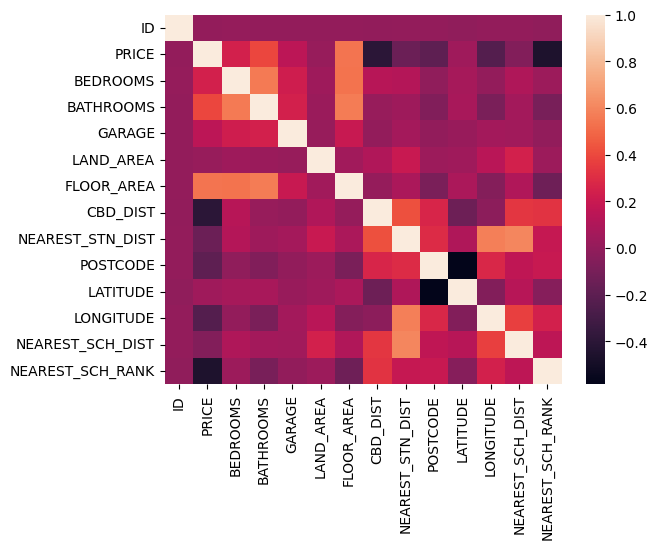

In [50]:
corr = school_nona.corr()
sns.heatmap(corr)

In [51]:
year = df.drop(["ADDRESS", "SUBURB", "NEAREST_STN", "NEAREST_SCH", "DATE_SOLD", "NEAREST_SCH_RANK"], axis=1)

test_year = test_df.drop(["ADDRESS", "SUBURB", "NEAREST_STN", "NEAREST_SCH", "DATE_SOLD", "NEAREST_SCH_RANK"], axis=1)

In [52]:
year_nona = year.dropna(axis=0)

test_year_nona = test_year.dropna(axis=0)

In [53]:
year_predict = year[year.BUILD_YEAR.isna()]

test_year_predict = test_year[test_year.BUILD_YEAR.isna()]

<AxesSubplot:>

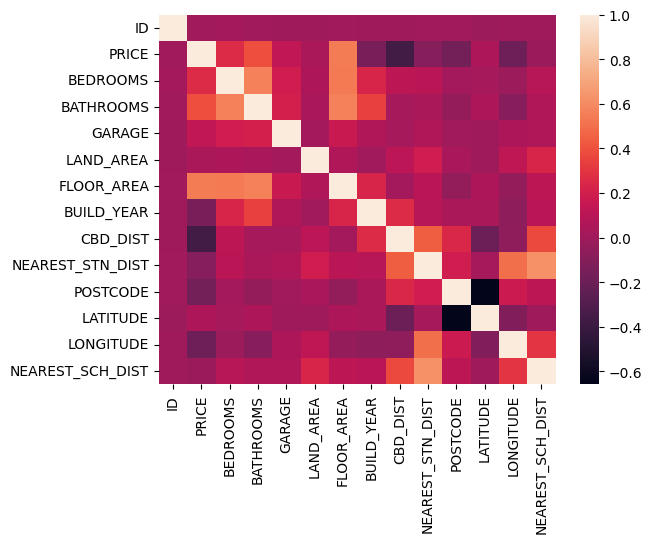

In [54]:
corr = year_nona.corr()
sns.heatmap(corr)

# train 학교 랭킹 예측

In [55]:
X = school_nona.drop("NEAREST_SCH_RANK", axis=1)
y = school_nona.NEAREST_SCH_RANK

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
RFR.score(X_test,y_test)

0.9696260277648492

In [56]:
cross_val_score(RFR, X,y,cv=5)

array([0.9620097 , 0.96094885, 0.96255444, 0.9655541 , 0.95707658])

In [57]:
X_pred = school_predict.drop("NEAREST_SCH_RANK", axis=1)

school_predict.drop("NEAREST_SCH_RANK", axis=1)

school_predict["NEAREST_SCH_RANK"] = RFR.predict(X_pred)

c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [58]:
school_predict["NEAREST_SCH_RANK"]

1         82.21
6        138.00
8         77.37
12        80.73
14        93.75
          ...  
18493     88.02
18499    129.81
18500    105.64
18504     92.78
18507     57.72
Name: NEAREST_SCH_RANK, Length: 6000, dtype: float64

# test 학교 랭킹 예측

In [59]:
X = test_school_nona.drop("NEAREST_SCH_RANK", axis=1)
y = test_school_nona.NEAREST_SCH_RANK

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

test_RFR = RandomForestRegressor(random_state=42)
test_RFR.fit(X_train, y_train)
test_RFR.score(X_test,y_test)

# random_state=42 : 0.9478678629261529
# random_state=1 : 0.9641072846178794

0.9641072846178794

In [60]:
cross_val_score(test_RFR, X,y,cv=5)

array([0.95915402, 0.95217549, 0.95475413, 0.95562902, 0.96021686])

In [61]:
X_pred = test_school_predict.drop("NEAREST_SCH_RANK", axis=1)

test_school_predict.drop("NEAREST_SCH_RANK", axis=1)

test_school_predict["NEAREST_SCH_RANK"] = test_RFR.predict(X_pred)

c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [62]:
test_school_predict["NEAREST_SCH_RANK"]

0         81.53
4         55.37
5        103.35
9        133.94
20        94.54
          ...  
15132     78.25
15135    128.96
15141    108.48
15142     85.00
15145    106.27
Name: NEAREST_SCH_RANK, Length: 4952, dtype: float64

In [63]:
df.NEAREST_SCH_RANK.fillna(school_predict["NEAREST_SCH_RANK"], inplace=True)

test_df.NEAREST_SCH_RANK.fillna(test_school_predict["NEAREST_SCH_RANK"], inplace=True)

# train 건축 년도 예측

In [64]:
X = year_nona.drop("BUILD_YEAR", axis=1)
y = year_nona.BUILD_YEAR

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

RFR = LinearRegression()
RFR.fit(X_train, y_train)
RFR.score(X_test,y_test)

0.2556827225382242

In [65]:
cross_val_score(RFR, X,y,cv=5)

array([0.2558905 , 0.2712034 , 0.26770857, 0.27156746, 0.28070587])

In [66]:
X_pred = year_predict.drop("BUILD_YEAR", axis=1)

year_predict.drop("BUILD_YEAR", axis=1)

year_predict["BUILD_YEAR"] = RFR.predict(X_pred)

c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [67]:
year_predict["BUILD_YEAR"]

17       1989.096814
18       1980.238692
19       1989.118059
22       1993.621886
28       1978.932392
            ...     
18459    2006.403209
18466    1970.375802
18487    1978.189796
18492    1977.614217
18501    1982.345628
Name: BUILD_YEAR, Length: 1728, dtype: float64

# test 건축 년도 예측

In [68]:
X = test_year_nona.drop("BUILD_YEAR", axis=1)
y = test_year_nona.BUILD_YEAR

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

RFR = LinearRegression()
RFR.fit(X_train, y_train)
RFR.score(X_test,y_test)

0.22258849572066375

In [69]:
cross_val_score(RFR, X,y,cv=5)

array([0.23056525, 0.2152225 , 0.18569591, 0.20514647, 0.19600989])

In [70]:
X_pred = test_year_predict.drop("BUILD_YEAR", axis=1)

test_year_predict.drop("BUILD_YEAR", axis=1)

test_year_predict["BUILD_YEAR"] = RFR.predict(X_pred)

c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [71]:
test_year_predict["BUILD_YEAR"]

11       1987.370040
22       1990.075741
24       2000.329807
46       1988.450396
51       1977.097530
            ...     
15109    1983.742782
15118    2008.406279
15121    2000.859744
15126    1987.680356
15128    1975.839955
Name: BUILD_YEAR, Length: 1427, dtype: float64

In [72]:
df.BUILD_YEAR.fillna(year_predict["BUILD_YEAR"], inplace=True)

test_df.BUILD_YEAR.fillna(test_year_predict["BUILD_YEAR"], inplace=True)

In [73]:
df.isna().sum()

ID                  0
ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
dtype: int64

In [74]:
test_df.isna().sum()

ID                  0
ADDRESS             0
SUBURB              0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
dtype: int64

In [75]:
date_sold = pd.to_datetime(df.DATE_SOLD)
df["MONTH_SOLD"] = date_sold.apply(lambda x: x.month)
df["YEAR_SOLD"] = date_sold.apply(lambda x: x.year)

test_date_sold = pd.to_datetime(test_df.DATE_SOLD)
test_df["MONTH_SOLD"] = test_date_sold.apply(lambda x: x.month)
test_df["YEAR_SOLD"] = test_date_sold.apply(lambda x: x.year)

In [76]:
data = df.drop(["ADDRESS", "SUBURB", "NEAREST_SCH", "NEAREST_STN", "DATE_SOLD"], axis=1)

test_data = test_df.drop(["ADDRESS", "SUBURB", "NEAREST_SCH", "NEAREST_STN", "DATE_SOLD"], axis=1)

In [77]:
X = data.drop('PRICE', axis=1)
y = data.PRICE

X_train, X_test, y_train, y_test = train_test_split(
  X,
  y, 
  test_size=0.2,
  random_state=2
)

In [78]:
RFR = RandomForestRegressor(random_state=42)

RFR.fit(X_train, y_train)

RFR.score(X_test, y_test)

0.8351197284012484

In [79]:
cross_val_score(RFR, X, y, cv=5)

array([0.80724736, 0.81434227, 0.84169085, 0.83006126, 0.81783027])

In [80]:
y_pred = RFR.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 90462.1
Mean Squared Error: 22441185425.81
R-squared scores: 0.84


In [82]:
sub_pred = RFR.predict(test_data)

In [83]:
# submit_df = pd.read_csv('./sample_submission.csv')

# submit_df['PRICE'] = sub_pred

# submit_df.to_csv('model12_REG_test3_84.csv', index=False)